In [15]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from scipy.special import logit, expit

In [16]:
Data=pd.read_csv('1000_maxstrains_upt_logitrisk.csv',sep=';')
X = Data[ Data.columns[1:23]]
y = Data['LOGIT(risk)']
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [17]:
y=expit(y)

In [3]:
alpha = np.linspace(1e-06, 0.1, 100, endpoint=True)
solver=['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
# normalize=[True,False]


random_grid = {"alpha" :alpha,
#                "normalize":normalize,
               "solver":solver}

In [4]:

rf = Ridge()
reg = GridSearchCV(rf,param_grid = random_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,y)
    

Fitting 10 folds for each of 700 candidates, totalling 7000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1984 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 3288 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 4748 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 6528 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 6977 out of 7000 | elapsed:   51.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 7000 out of 7000 | elapsed:   51.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-06, 1.01109091e-03, 2.02118182e-03, 3.03127273e-03,
       4.04136364e-03, 5.05145455e-03, 6.06154545e-03, 7.07163636e-03,
       8.08172727e-03, 9.09181818e-03, 1.01019091e-02, 1.11120000e-02,
       1.21220909e-02, 1.31321818e-02, 1.41422727e-02, 1.5152...
       8.48486364e-02, 8.58587273e-02, 8.68688182e-02, 8.78789091e-02,
       8.88890000e-02, 8.98990909e-02, 9.09091818e-02, 9.19192727e-02,
       9.29293636e-02, 9.39394545e-02, 9.49495455e-02, 9.59596364e-02,
       9.69697273e-02, 9.79798182e-02, 9.89899091e-02, 1.00000000e-01]),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [5]:
reg.best_estimator_

Ridge(alpha=0.05757618181818182, solver='sag')

In [21]:
modo=Ridge(alpha=0.05757618181818182, solver='sag')
mod = TransformedTargetRegressor(regressor=modo, func=logit,inverse_func=expit)

In [22]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [28]:
y=expit(y)
mod = TransformedTargetRegressor(regressor=modo, func=logit,inverse_func=expit)
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])
kf=cv

In [30]:
pd.DataFrame(test_mean)

,0
0,0.040355
1,0.044823
2,0.043704
3,0.043840
4,0.044925
5,0.046020


## Learning Curve

<Figure size 576x396 with 0 Axes>

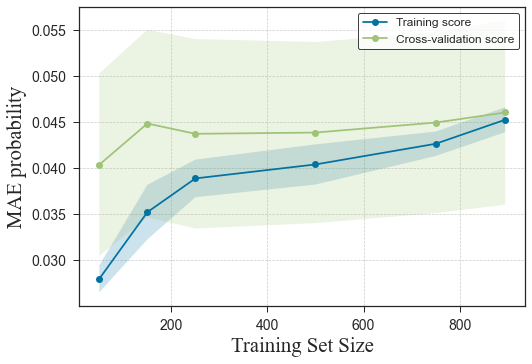

In [29]:
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
# plt.figure()
# plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
# plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
# plt.xlabel("Training Set Size")
# plt.ylabel("RMS Error")
# plt.legend(loc="best")
# plt.show()

plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE probability", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('rskRIDLC', bbox_inches="tight")
plt.show()

## Unknown data test

In [7]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()


Root Mean squared error: 1.742282

Root Mean squared error: 1.463158

Root Mean squared error: 1.599946

Root Mean squared error: 2.281692

Root Mean squared error: 1.742388

Root Mean squared error: 2.125088

Root Mean squared error: 1.934700

Root Mean squared error: 2.519884

Root Mean squared error: 1.938748

Root Mean squared error: 2.434370



In [8]:
ytestunk=HBM_Train.predict(X_Test)
ytestunk=expit(ytestunk)
y_Test=expit(y_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    2.6647
dtype: float64  error mean --->0    0.052748
Name: mean, dtype: float64  error std --->0    0.140557
Name: std, dtype: float64


# train score

In [9]:
ytr=HBM_Train.predict(X)
ytr=expit(ytr)
y=expit(y)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    2.83093
dtype: float64  error mean --->0    0.043724
Name: mean, dtype: float64  error std --->0    0.12378
Name: std, dtype: float64


In [10]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,796.000000
mean,-0.003522
std,0.131238
min,-0.763403
25%,-0.000495
50%,-0.000003
75%,0.000654
max,0.938323


In [11]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,-0.014058
std,0.149512
min,-0.730622
25%,-0.001151
50%,-0.000007
75%,0.000203
max,0.743369


In [13]:
# df_tosave=pd.DataFrame(ytestunk,columns = ['Unseen predicted'])
# df_tosave['test actual']=pd.DataFrame(y_Test)
# df_tosave.to_csv('riunseen.csv')

# df_trn=pd.DataFrame(ytr,columns = ['train predicted'])
# df_trn['actual']=pd.DataFrame(y)
# df_trn.to_csv('ritrain.csv')

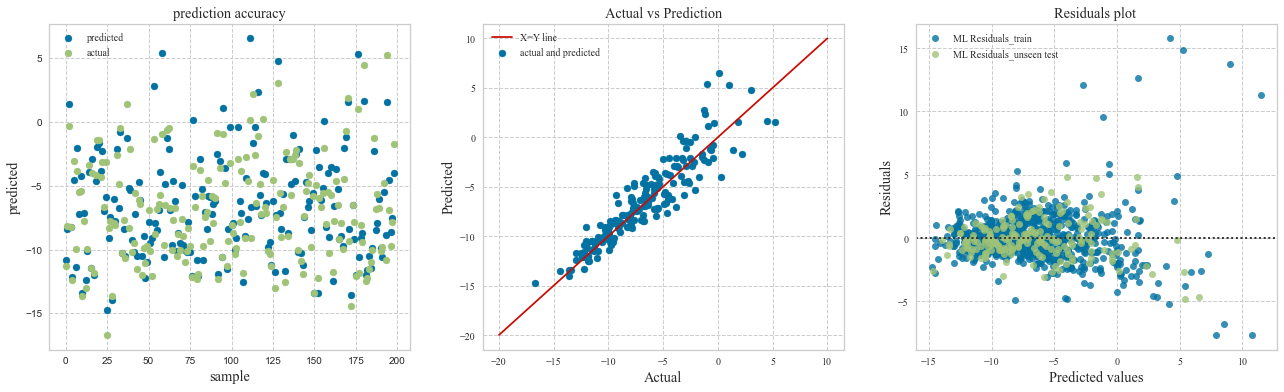

In [14]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([-20,10],[-20,10],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=(y), x=(ytr),label='ML Residuals_train')
r=sns.residplot(y=(y_Test), x=(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()

# Lasso

In [31]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection
from yellowbrick.regressor import ManualAlphaSelection

In [30]:
alpha = np.linspace(1e-06, 0.1, 100, endpoint=True)
selection=['cyclic','random']
# normalize=[True,False]
# warm_start=[True,False]

random_grid = {"alpha" :alpha,
#                "normalize":normalize,
#                "warm_start":warm_start,
               "selection":selection}

In [32]:
Data=pd.read_csv('1000_maxstrains_upt_logitrisk.csv',sep=';')
X = Data[ Data.columns[1:23]]
y = Data['LOGIT(risk)']
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [ ]:

rf = Lasso()
reg = GridSearchCV(rf,param_grid = random_grid ,cv = cv, return_train_score=True,scoring="neg_mean_absolute_error", verbose=2, n_jobs = -1)
reg.fit(X,y)
    

In [22]:
reg.best_estimator_

Lasso(alpha=0.026263363636363637, selection='random')

In [34]:
y=expit(y)
mod = TransformedTargetRegressor(regressor=modo, func=logit,inverse_func=expit)
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])
kf=cv

In [33]:
modo=Lasso(alpha=0.026263363636363637, selection='random')

# from sklearn.compose import TransformedTargetRegressor
# from sklearn.preprocessing import QuantileTransformer
# mod= TransformedTargetRegressor(regressor=modo,transformer=QuantileTransformer(output_distribution='normal'))#Chest

In [33]:
cv = KFold(n_splits=10, random_state=1)

In [34]:
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error')
kf=cv

In [37]:
pd.DataFrame((test_mean))

,0
0,0.040467
1,0.044740
2,0.043430
3,0.043812
4,0.044882
5,0.045917


## Learning Curve

<Figure size 576x396 with 0 Axes>

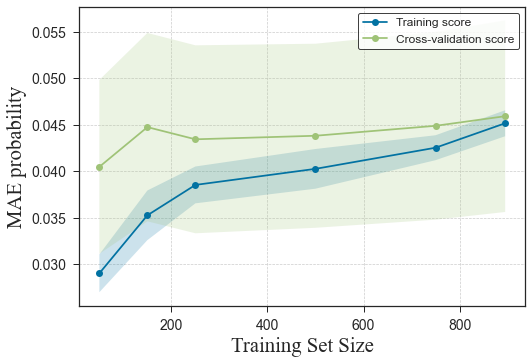

In [35]:
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
# plt.figure()
# plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
# plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
# plt.xlabel("Training Set Size")
# plt.ylabel("RMS Error")
# plt.legend(loc="best")
# plt.show()

plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE probability", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('rskLasLC', bbox_inches="tight")
plt.show()

## Unknown data test

In [18]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()



Root Mean squared error: 1.742107

Root Mean squared error: 1.454626

Root Mean squared error: 1.602605

Root Mean squared error: 2.282523

Root Mean squared error: 1.740197

Root Mean squared error: 2.128945

Root Mean squared error: 1.942995

Root Mean squared error: 2.519317

Root Mean squared error: 1.938858

Root Mean squared error: 2.424316



In [19]:
ytestunk=HBM_Train.predict(X_Test)
ytestunk=expit(ytestunk)
y_Test=expit(y_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print('___________________________________')
print('|error COV  |  {0} | \n|error mean |  {1}| \n|error std  |  {2}|'.format(cov_r[0],abs(a.loc['mean'][0]),a.loc['std'][0]))
print('___________________________________')

___________________________________
|error COV  |  2.682124950261215 | 
|error mean |  0.052290207104992395| 
|error std  |  0.14024886913062637|
___________________________________


# train score

In [20]:
ytr=HBM_Train.predict(X)
ytr=expit(ytr)
y=expit(y)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print('___________________________________')
print('|error COV  |  {0} | \n|error mean |  {1}| \n|error std  |  {2}|'.format(cov_r[0],abs(a.loc['mean'][0]),a.loc['std'][0]))
print('___________________________________')

___________________________________
|error COV  |  2.838013951262253 | 
|error mean |  0.04364082576369532| 
|error std  |  0.12385327236197251|
___________________________________


In [21]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,796.000000
mean,-0.003149
std,0.131288
min,-0.770142
25%,-0.000441
50%,-0.000003
75%,0.000708
max,0.945390


In [22]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,-0.014382
std,0.149030
min,-0.729540
25%,-0.001124
50%,-0.000006
75%,0.000228
max,0.742287


In [20]:
# df_tosave=pd.DataFrame(ytestunk,columns = ['Unseen predicted'])
# df_tosave['test actual']=pd.DataFrame(y_Test)
# df_tosave.to_csv('launseen.csv')

# df_trn=pd.DataFrame(ytr,columns = ['train predicted'])
# df_trn['actual']=pd.DataFrame(y)
# df_trn.to_csv('latrain.csv')

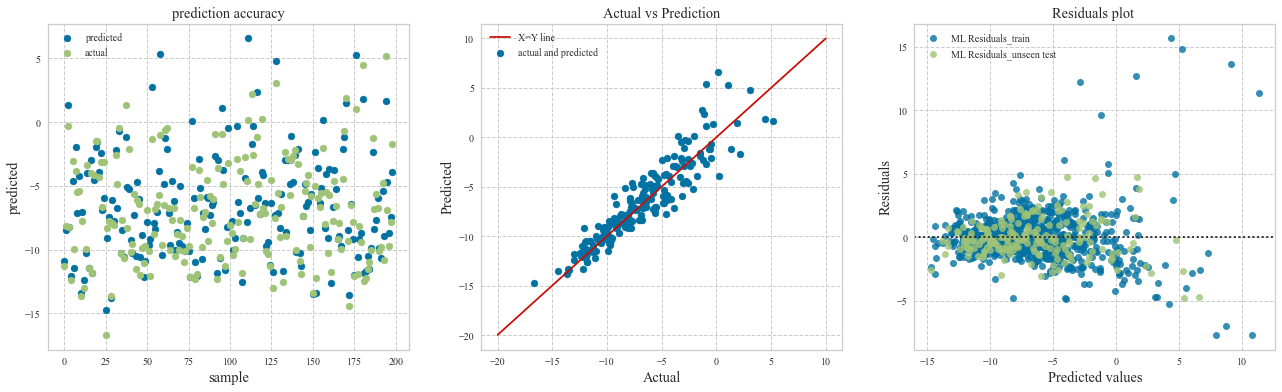

In [25]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([-20,10],[-20,10],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=(y), x=(ytr),label='ML Residuals_train')
r=sns.residplot(y=(y_Test), x=(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()